<h3>Best Time to Ask Questions in Hacker News - Analyzing Hacker News Posts<h3>

The goal of this analysis was to compare the number of comments received by two types of posts on Hacker News: 'Ask HN' and 'Show HN'. Additionally, I explored how the time of day a post was made influenced the number of comments it received.

I cleaned and processed the dataset of Hacker News submissions to extract relevant features such as the post type and creation time. Then, I calculated the average number of comments for 'Ask HN' and 'Show HN' posts and analyzed whether posts made at specific times received more comments.

The analysis revealed that 'Ask HN' posts generally received more comments on average compared to 'Show HN' posts. Additionally, I found certain time periods where posts received a higher number of comments, possibly reflecting user activity patterns.

In [35]:
from csv import reader 

with open('hacker_news.csv') as opened_file:
    
    read_file = reader(opened_file)
    hn = list(read_file)

print(hn[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']]


In [37]:
headers =  hn[0]
hn = hn[1:] # Omit the first row - it contains the headers

print(hn[:5])

[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


In [39]:
# Initialize empty lists to hold posts of different types
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))

1744
1162
17194


In [45]:
# Initialize a variable to track the total number of comments for 'Ask HN' posts
total_ask_comments = 0

for post in ask_posts:
    num = post[4]
    num_int = int(num)
    total_ask_comments += num_int
    
avg_ask_comments = total_ask_comments / len(ask_posts)

print(avg_ask_comments)

# Initialize a variable to track the total number of comments for 'Show HN' posts
total_show_comments = 0

for post in show_posts:
    num = post[4]
    num_int = int(num)
    total_show_comments += num_int
    
avg_show_comments = total_show_comments / len(show_posts)

print(avg_show_comments)

14.038417431192661
10.31669535283993


On average, 'Ask HN' posts receive more comments

In [48]:
from datetime import datetime as dt

# Initialize an empty list to store the creation time and number of comments for 'Ask HN' posts
result_list = []

for row in ask_posts:
    created_at = row[6]
    num_comments = row[4]
    result_list.append([created_at, int(num_comments)])
    
# Initialize dictionaries to store counts of posts and total comments per hour
counts_by_hour = {}
comments_by_hour = {}

for row in result_list:
    post_date = row[0]
    num_comments = row[1]
    datetime_object = dt.strptime(post_date, "%m/%d/%Y %H:%M")
    hour_date = datetime_object.strftime("%H")
    
    if hour_date not in counts_by_hour:
        counts_by_hour[hour_date] = 1
        comments_by_hour[hour_date] = num_comments
    else:
        counts_by_hour[hour_date] += 1
        comments_by_hour[hour_date] += num_comments


In [63]:
avg_by_hour = []

for hour in comments_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour] / counts_by_hour[hour]])

print(avg_by_hour)      

[['09', 5.5777777777777775], ['13', 14.741176470588234], ['10', 13.440677966101696], ['14', 13.233644859813085], ['16', 16.796296296296298], ['23', 7.985294117647059], ['12', 9.41095890410959], ['17', 11.46], ['15', 38.5948275862069], ['21', 16.009174311926607], ['20', 21.525], ['02', 23.810344827586206], ['18', 13.20183486238532], ['03', 7.796296296296297], ['05', 10.08695652173913], ['19', 10.8], ['01', 11.383333333333333], ['22', 6.746478873239437], ['08', 10.25], ['04', 7.170212765957447], ['00', 8.127272727272727], ['06', 9.022727272727273], ['07', 7.852941176470588], ['11', 11.051724137931034]]


In [65]:
swap_avg_by_hour = [] 

for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])

print(swap_avg_by_hour)
                            

[[5.5777777777777775, '09'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [16.796296296296298, '16'], [7.985294117647059, '23'], [9.41095890410959, '12'], [11.46, '17'], [38.5948275862069, '15'], [16.009174311926607, '21'], [21.525, '20'], [23.810344827586206, '02'], [13.20183486238532, '18'], [7.796296296296297, '03'], [10.08695652173913, '05'], [10.8, '19'], [11.383333333333333, '01'], [6.746478873239437, '22'], [10.25, '08'], [7.170212765957447, '04'], [8.127272727272727, '00'], [9.022727272727273, '06'], [7.852941176470588, '07'], [11.051724137931034, '11']]


In [67]:
sorted_swap = sorted(swap_avg_by_hour, reverse = True)

print(sorted_swap[:5])

[[38.5948275862069, '15'], [23.810344827586206, '02'], [21.525, '20'], [16.796296296296298, '16'], [16.009174311926607, '21']]


In [69]:
for row in sorted_swap:
    hour = row[1]
    comments = row[0]
    datetime_object = dt.strptime(hour, "%H")
    formatted_date = datetime_object.strftime("%H:%M")
    print(f"{formatted_date}:{comments: .2f} average comments per post")

15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post
13:00: 14.74 average comments per post
10:00: 13.44 average comments per post
14:00: 13.23 average comments per post
18:00: 13.20 average comments per post
17:00: 11.46 average comments per post
01:00: 11.38 average comments per post
11:00: 11.05 average comments per post
19:00: 10.80 average comments per post
08:00: 10.25 average comments per post
05:00: 10.09 average comments per post
12:00: 9.41 average comments per post
06:00: 9.02 average comments per post
00:00: 8.13 average comments per post
23:00: 7.99 average comments per post
07:00: 7.85 average comments per post
03:00: 7.80 average comments per post
04:00: 7.17 average comments per post
22:00: 6.75 average comments per post
09:00: 5.58 average comments per post


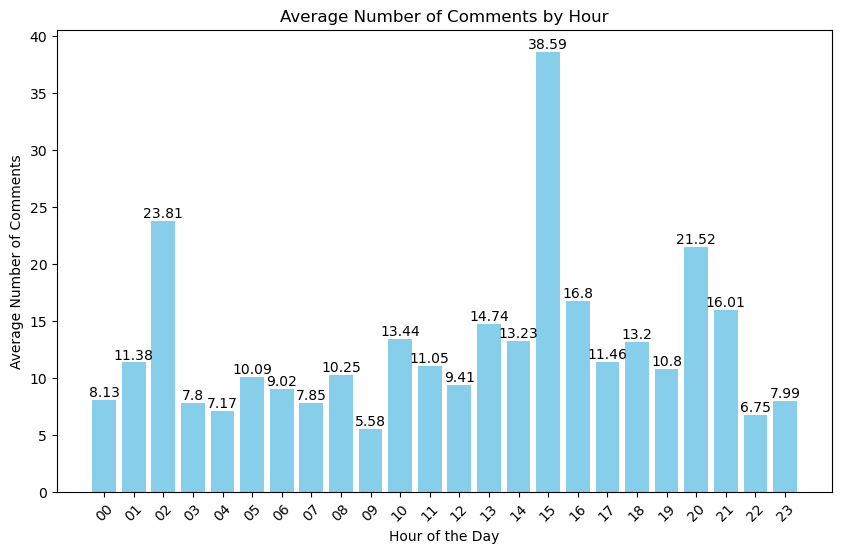

In [77]:
import matplotlib.pyplot as plt

hours = [row[1] for row in swap_avg_by_hour]  
avg_comments = [row[0] for row in swap_avg_by_hour]  

# Sort the data by hour to display the chart in chronological order
sorted_hours, sorted_avg_comments = zip(*sorted(zip(hours, avg_comments)))

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_hours, sorted_avg_comments, color='skyblue')

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments')
plt.title('Average Number of Comments by Hour')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add the average comments number on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (i.e., the average comments)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)

plt.show()


On average posts written between 15:00 and 16:00 have more comments. I